# Project-Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 



# Description of dataset

Rows :614

Columns :13

Target Variable :Loan_Status

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Importing all required library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")
#from sklearn.linear_model import LinearRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import LinearSVC
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
#from scipy.stats import zscore


Load the Data

In [2]:
#uploading dataset
ds=pd.read_csv("Loan_Application_Prediction.csv")
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#changing Dataset in Dataframe
ds=pd.DataFrame(data=ds)

# Dataset basic details analysis (Null Value,data type, shape etc )

In [4]:
# top 5 rows of dataset
ds.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#name of column index
ds.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

so as per dataset there are 422 loan approved and 192 loan not approved.

In [6]:
ds.shape

(614, 13)

there are 614 rows and 13 cloumns available in original dataset

In [7]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

there are objects and int values are present in data set.

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations: 

There are 8 object data and 5 int data in the given dataset.

We have to convert object columns in int value or drop in case they are not providing any proper informations.


In [9]:
ds.isnull()
#verifing the null value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# checking null value again in dataset
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations: there are some null value in Gender, Dependents, self employed, LoanAmount, LoanAmountTerm and Credit History columns in dataset.

In [11]:
#Filling Null values
ds['Gender'].fillna('Male',inplace=True)
ds['Married'].fillna('Yes',inplace=True)
ds['Dependents'].fillna('0',inplace=True)
ds['Self_Employed'].fillna('No',inplace=True)
ds['Loan_Amount_Term'].fillna(360.0,inplace=True)
ds['Credit_History'].fillna(1.0,inplace=True)



In [12]:
ds['LoanAmount'].isnull().sum()

22

In [13]:
ds['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [14]:
ds.LoanAmount = ds['LoanAmount'].fillna((ds.LoanAmount.mean()))
ds['LoanAmount'].isnull().sum()

0

In [15]:
#recheck null values
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that now there are no null values in this dataset

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Some columns having str values so Now we wil use Label Encoder to convert str into int

# Label Encoder

In [17]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
#transform non-numeric values into numeric
LE=LabelEncoder()

labelencoder_columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']

for i in ds[labelencoder_columns]:
    ds[i]=LE.fit_transform(ds[i])

In [19]:
ds.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

we will drop Loan_Id column because it is for only indexing and there is no need this column for Loan prediction

In [20]:
ds.drop(['Loan_ID'],axis=1,inplace=True)
ds.head(8)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0


In [21]:
#checking number of unique values in dataset
ds.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Data Visuliazation

Now Observing the target cloumn

In [22]:
ds['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

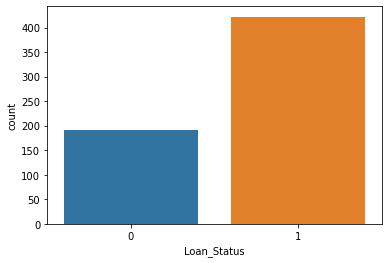

In [23]:
#By using count plot we can see the graph of approved and Not approved loan
sns.countplot(ds["Loan_Status"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

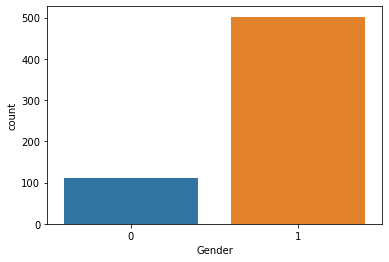

In [24]:
#count of catagory of gender
sns.countplot(ds["Gender"])

<AxesSubplot:xlabel='Married', ylabel='count'>

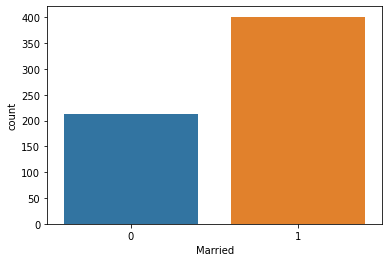

In [25]:
sns.countplot(ds["Married"])

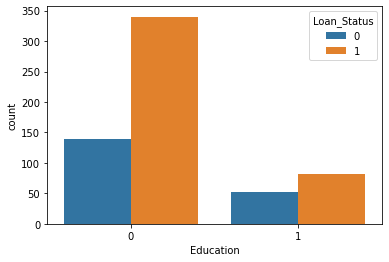

In [26]:
sns.countplot(x="Education",hue='Loan_Status', data=ds)
plt.show()

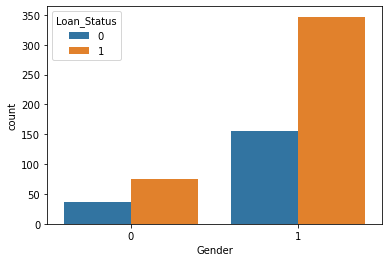

In [27]:
sns.countplot(x="Gender",hue='Loan_Status', data=ds)
plt.show()

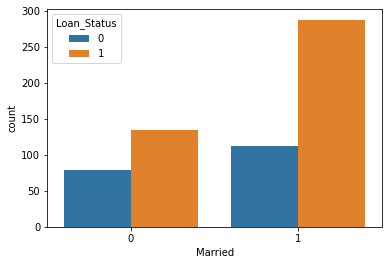

In [28]:
sns.countplot(x="Married",hue='Loan_Status', data=ds)
plt.show()

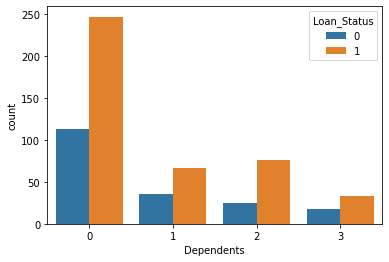

In [29]:
sns.countplot(x="Dependents",hue='Loan_Status', data=ds)
plt.show()

# EDA 

Identifing the target & Independent features¶


As per the project Loan_Status is target (or output) and other variables are independent features.

In [30]:
#to resolve the skewness, lets divide the new dataset into input and output datasets
x=ds.drop(columns=["Loan_Status"])
y=ds[["Loan_Status"]]

# (i) Univariate Analysis

In [31]:
ds.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

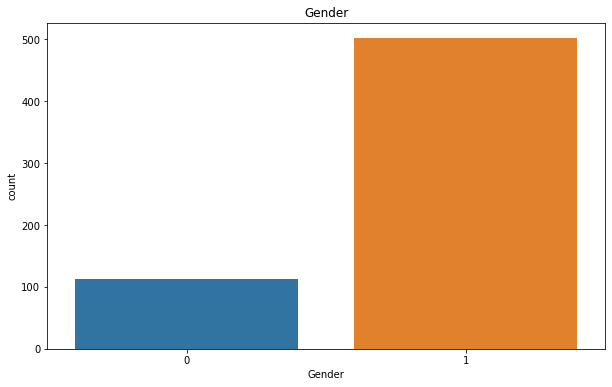

1    502
0    112
Name: Gender, dtype: int64


In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=ds)
plt.title('Gender')
plt.show()
print(ds['Gender'].value_counts())

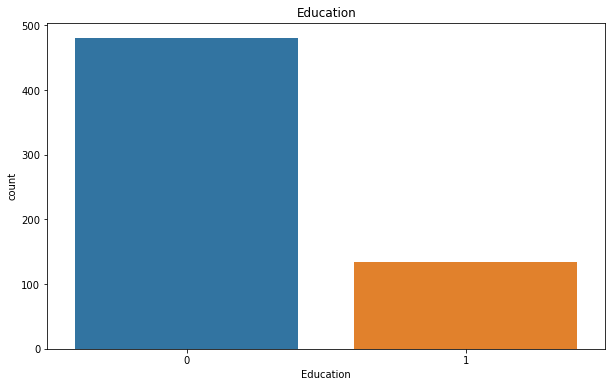

0    480
1    134
Name: Education, dtype: int64


In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education',data=ds)
plt.title('Education')
plt.show()
print(ds['Education'].value_counts())

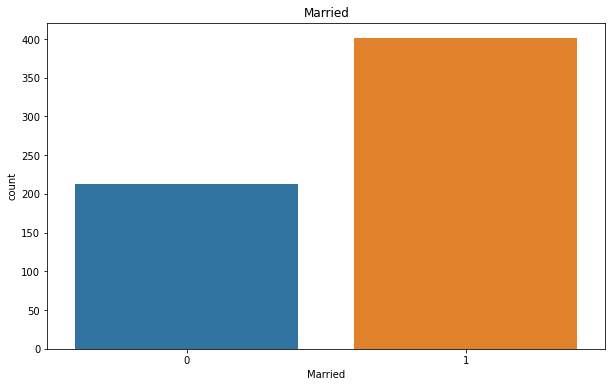

1    401
0    213
Name: Married, dtype: int64


In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married',data=ds)
plt.title('Married')
plt.show()
print(ds['Married'].value_counts())

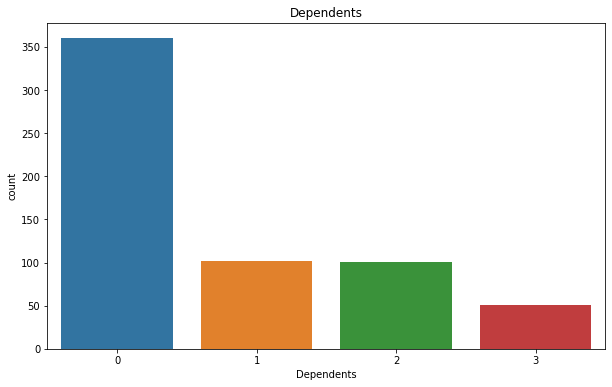

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dependents',data=ds)
plt.title('Dependents')
plt.show()
print(ds['Dependents'].value_counts())

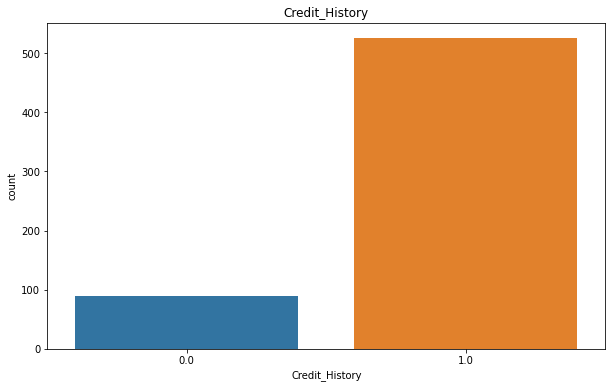

1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='Credit_History',data=ds)
plt.title('Credit_History')
plt.show()
print(ds['Credit_History'].value_counts())

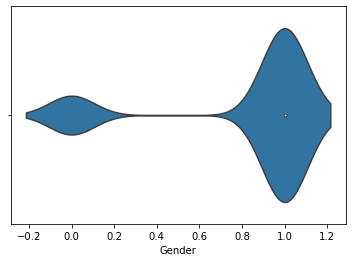

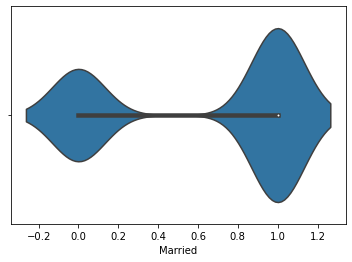

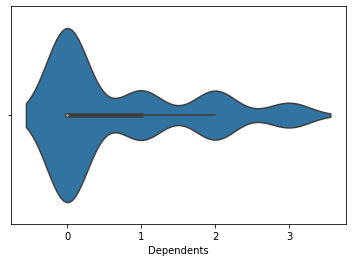

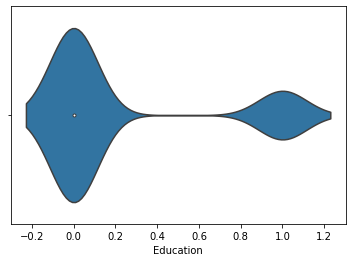

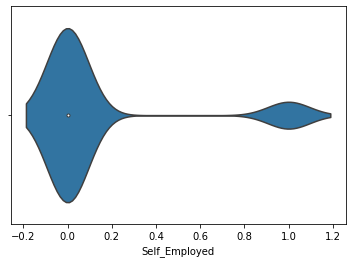

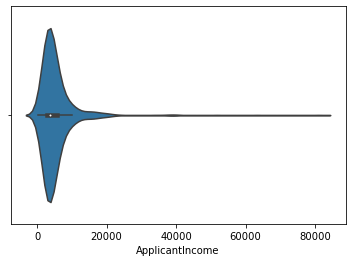

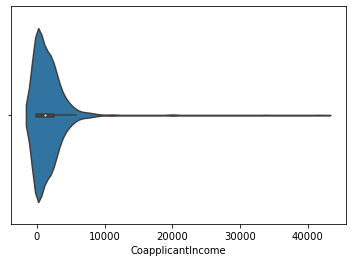

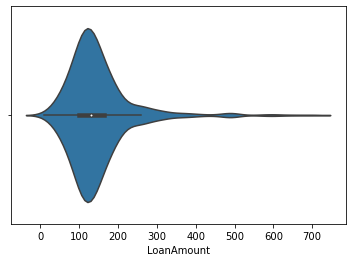

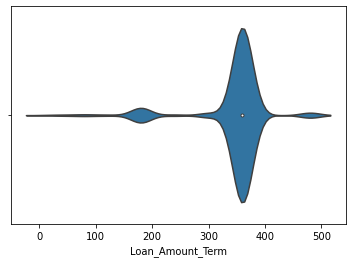

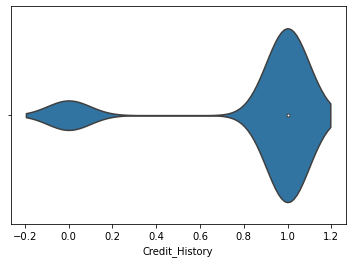

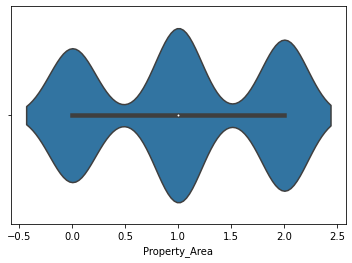

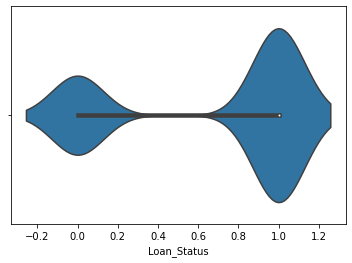

In [37]:
#using the below code creating violinplot.

columns1=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in ds[columns1]:
    plt.figure()
    sns.violinplot(ds[i], data=ds)

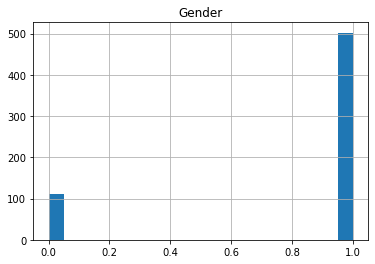

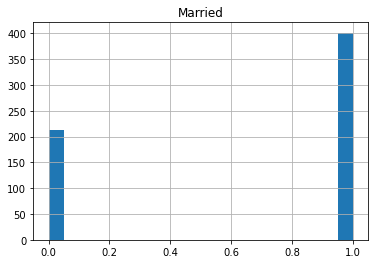

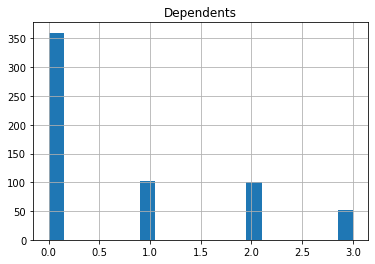

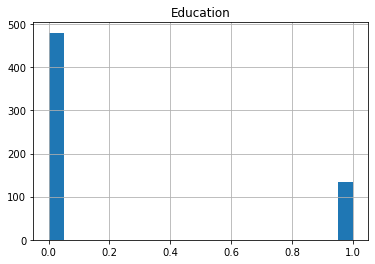

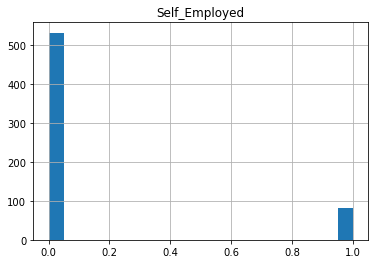

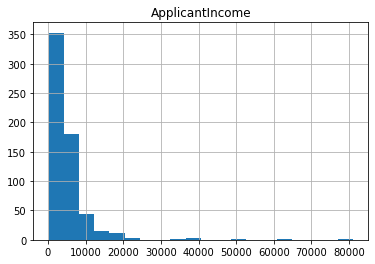

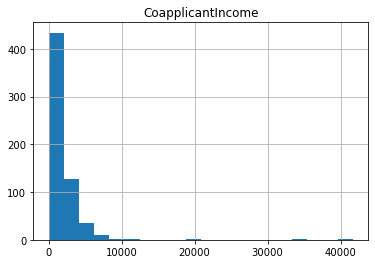

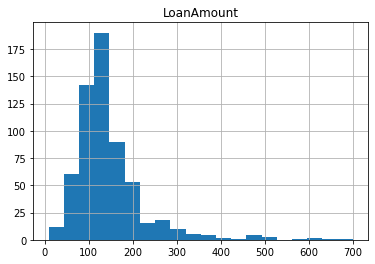

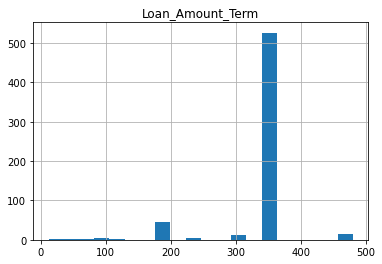

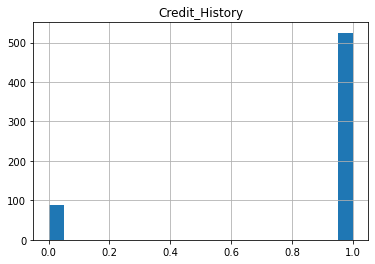

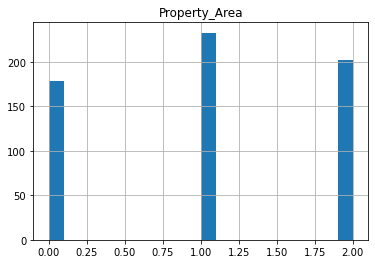

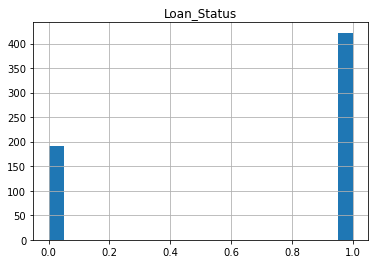

In [38]:
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for i in ds[columns]:
    plt.figure()
    plt.title(i)
    ds[i].hist(bins=20)

# Bivariate Analysis

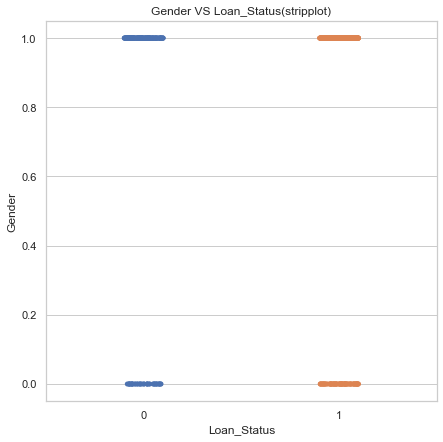

In [39]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="Gender",x="Loan_Status",data=ds) 
plt.title("Gender VS Loan_Status(stripplot)")
plt.show()

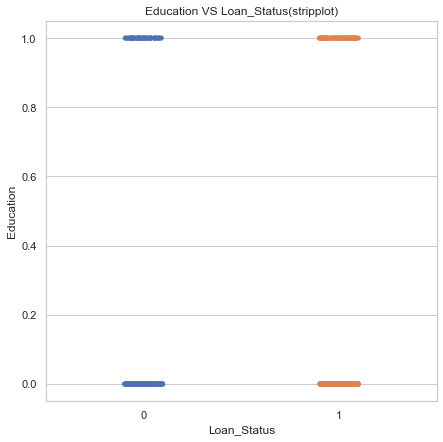

In [40]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="Education",x="Loan_Status",data=ds) 
plt.title("Education VS Loan_Status(stripplot)")
plt.show()

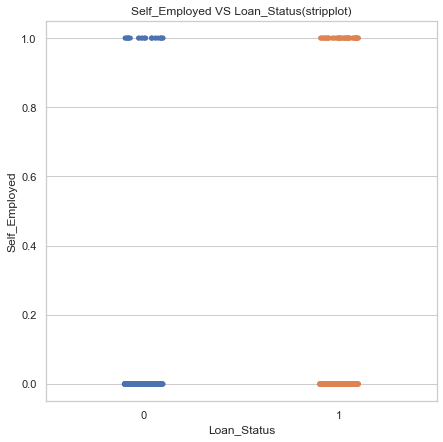

In [41]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="Self_Employed",x="Loan_Status",data=ds) 
plt.title("Self_Employed VS Loan_Status(stripplot)")
plt.show()

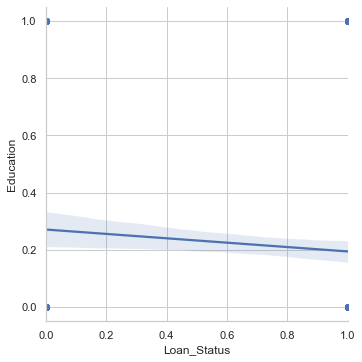

In [42]:
sns.lmplot(y="Education",x="Loan_Status",data=ds)

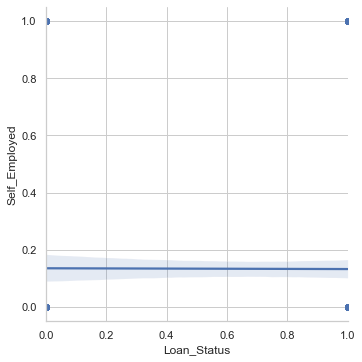

In [43]:
sns.lmplot(y="Self_Employed",x="Loan_Status",data=ds)

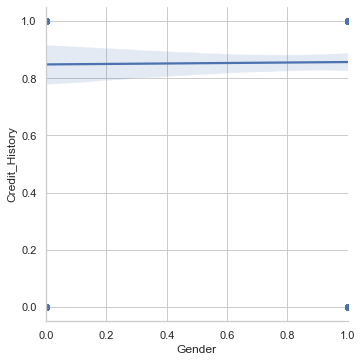

In [44]:
sns.lmplot(y="Credit_History",x="Gender",data=ds)

observation: there is no any direct relation between performance rating and training times last year

<AxesSubplot:xlabel='Gender', ylabel='Married'>

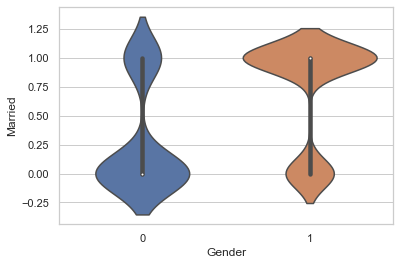

In [45]:
sns.violinplot(y="Married",x="Gender",data=ds)

<AxesSubplot:xlabel='Gender', ylabel='Dependents'>

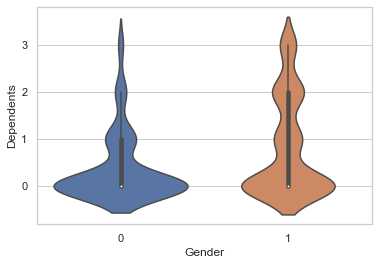

In [46]:
sns.violinplot(y="Dependents",x="Gender",data=ds)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Married'>

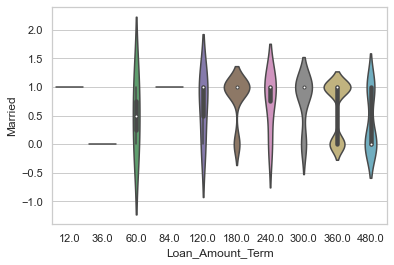

In [47]:
sns.violinplot(y="Married",x="Loan_Amount_Term",data=ds)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

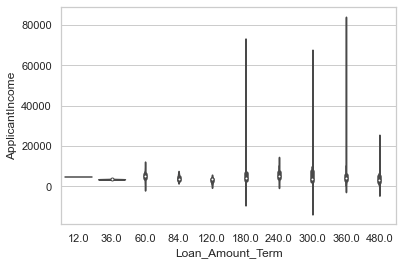

In [48]:
sns.violinplot(y="ApplicantIncome",x="Loan_Amount_Term",data=ds)

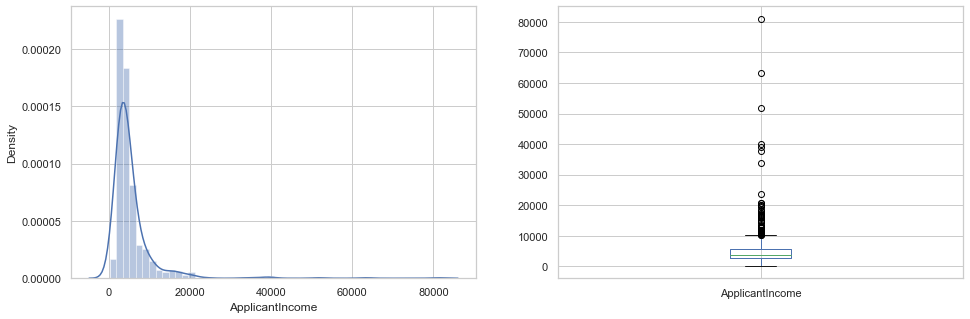

In [49]:
plt.figure(1)
plt.subplot(121)
sns.distplot(ds["ApplicantIncome"]);

plt.subplot(122)
ds["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Observation :
It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

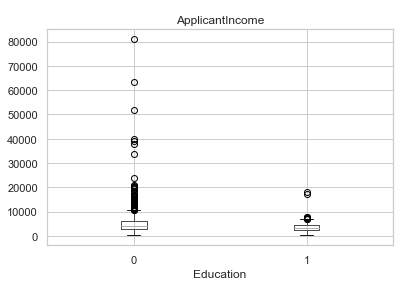

In [50]:
ds.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

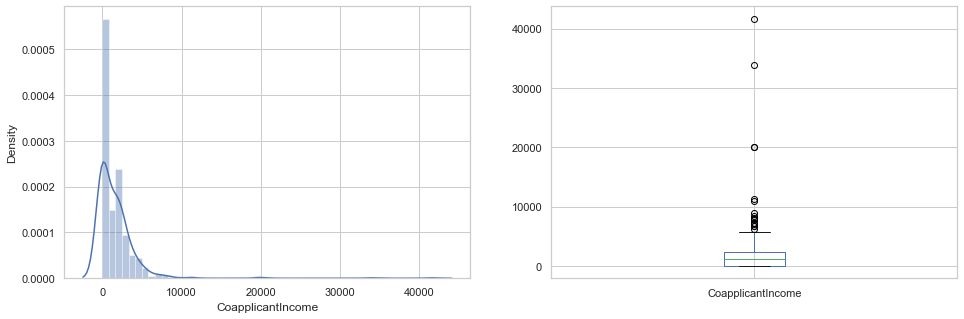

In [51]:
plt.subplot(121)
sns.distplot(ds["CoapplicantIncome"]);

plt.subplot(122)
ds["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Obsevation :
We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

"LoanAmount" distribution :

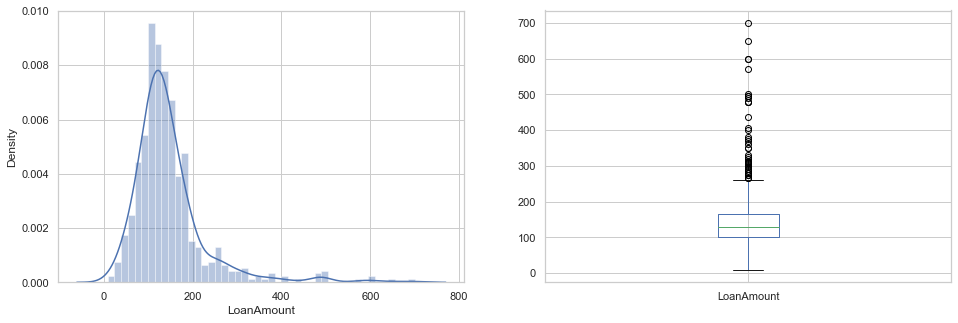

In [52]:
plt.figure(1)
plt.subplot(121)
sns.distplot(ds['LoanAmount']);

plt.subplot(122)
ds['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Observation :
We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# (iii) Multivariate Analysis

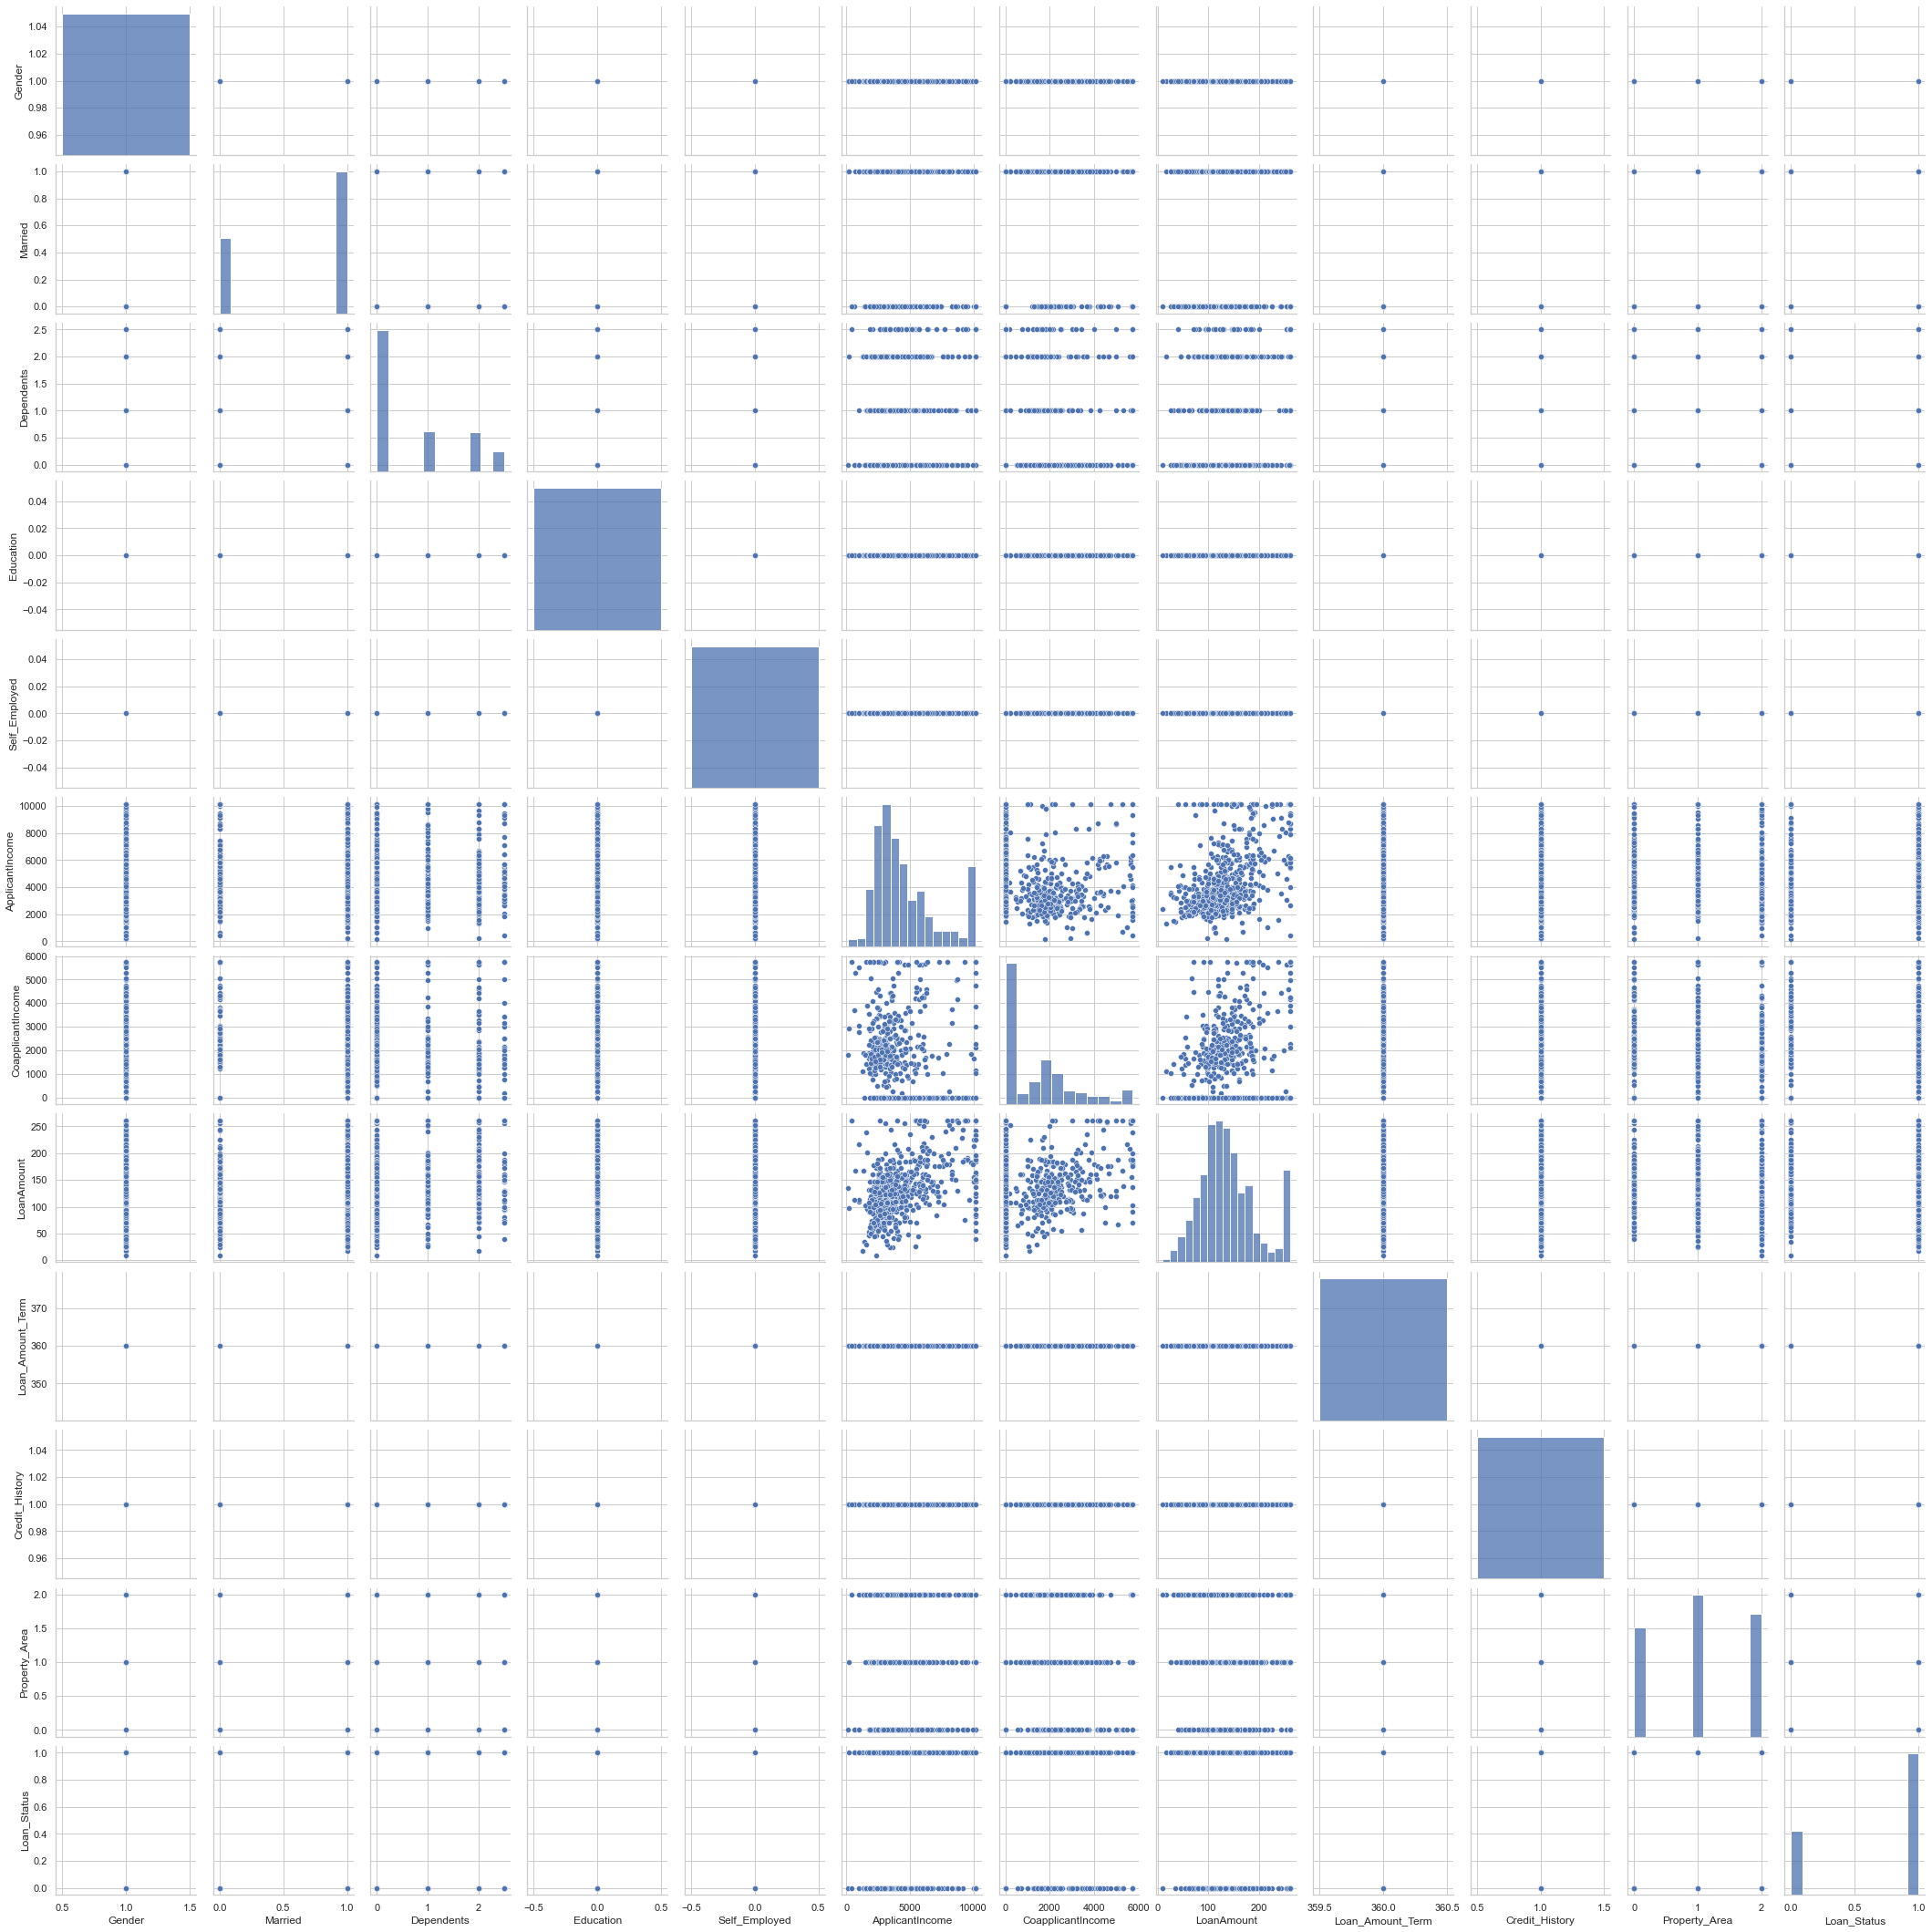

In [105]:
sns.pairplot(ds)

# EDA using Statistical approch 

In [54]:
#checking the correlations between columns
corr=ds.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

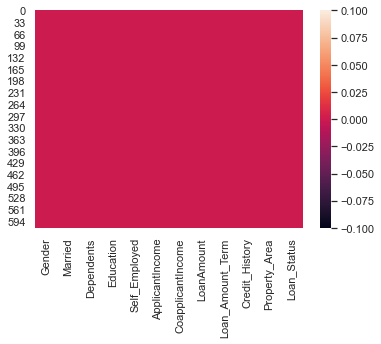

In [55]:
sns.heatmap(ds.isnull())

<AxesSubplot:>

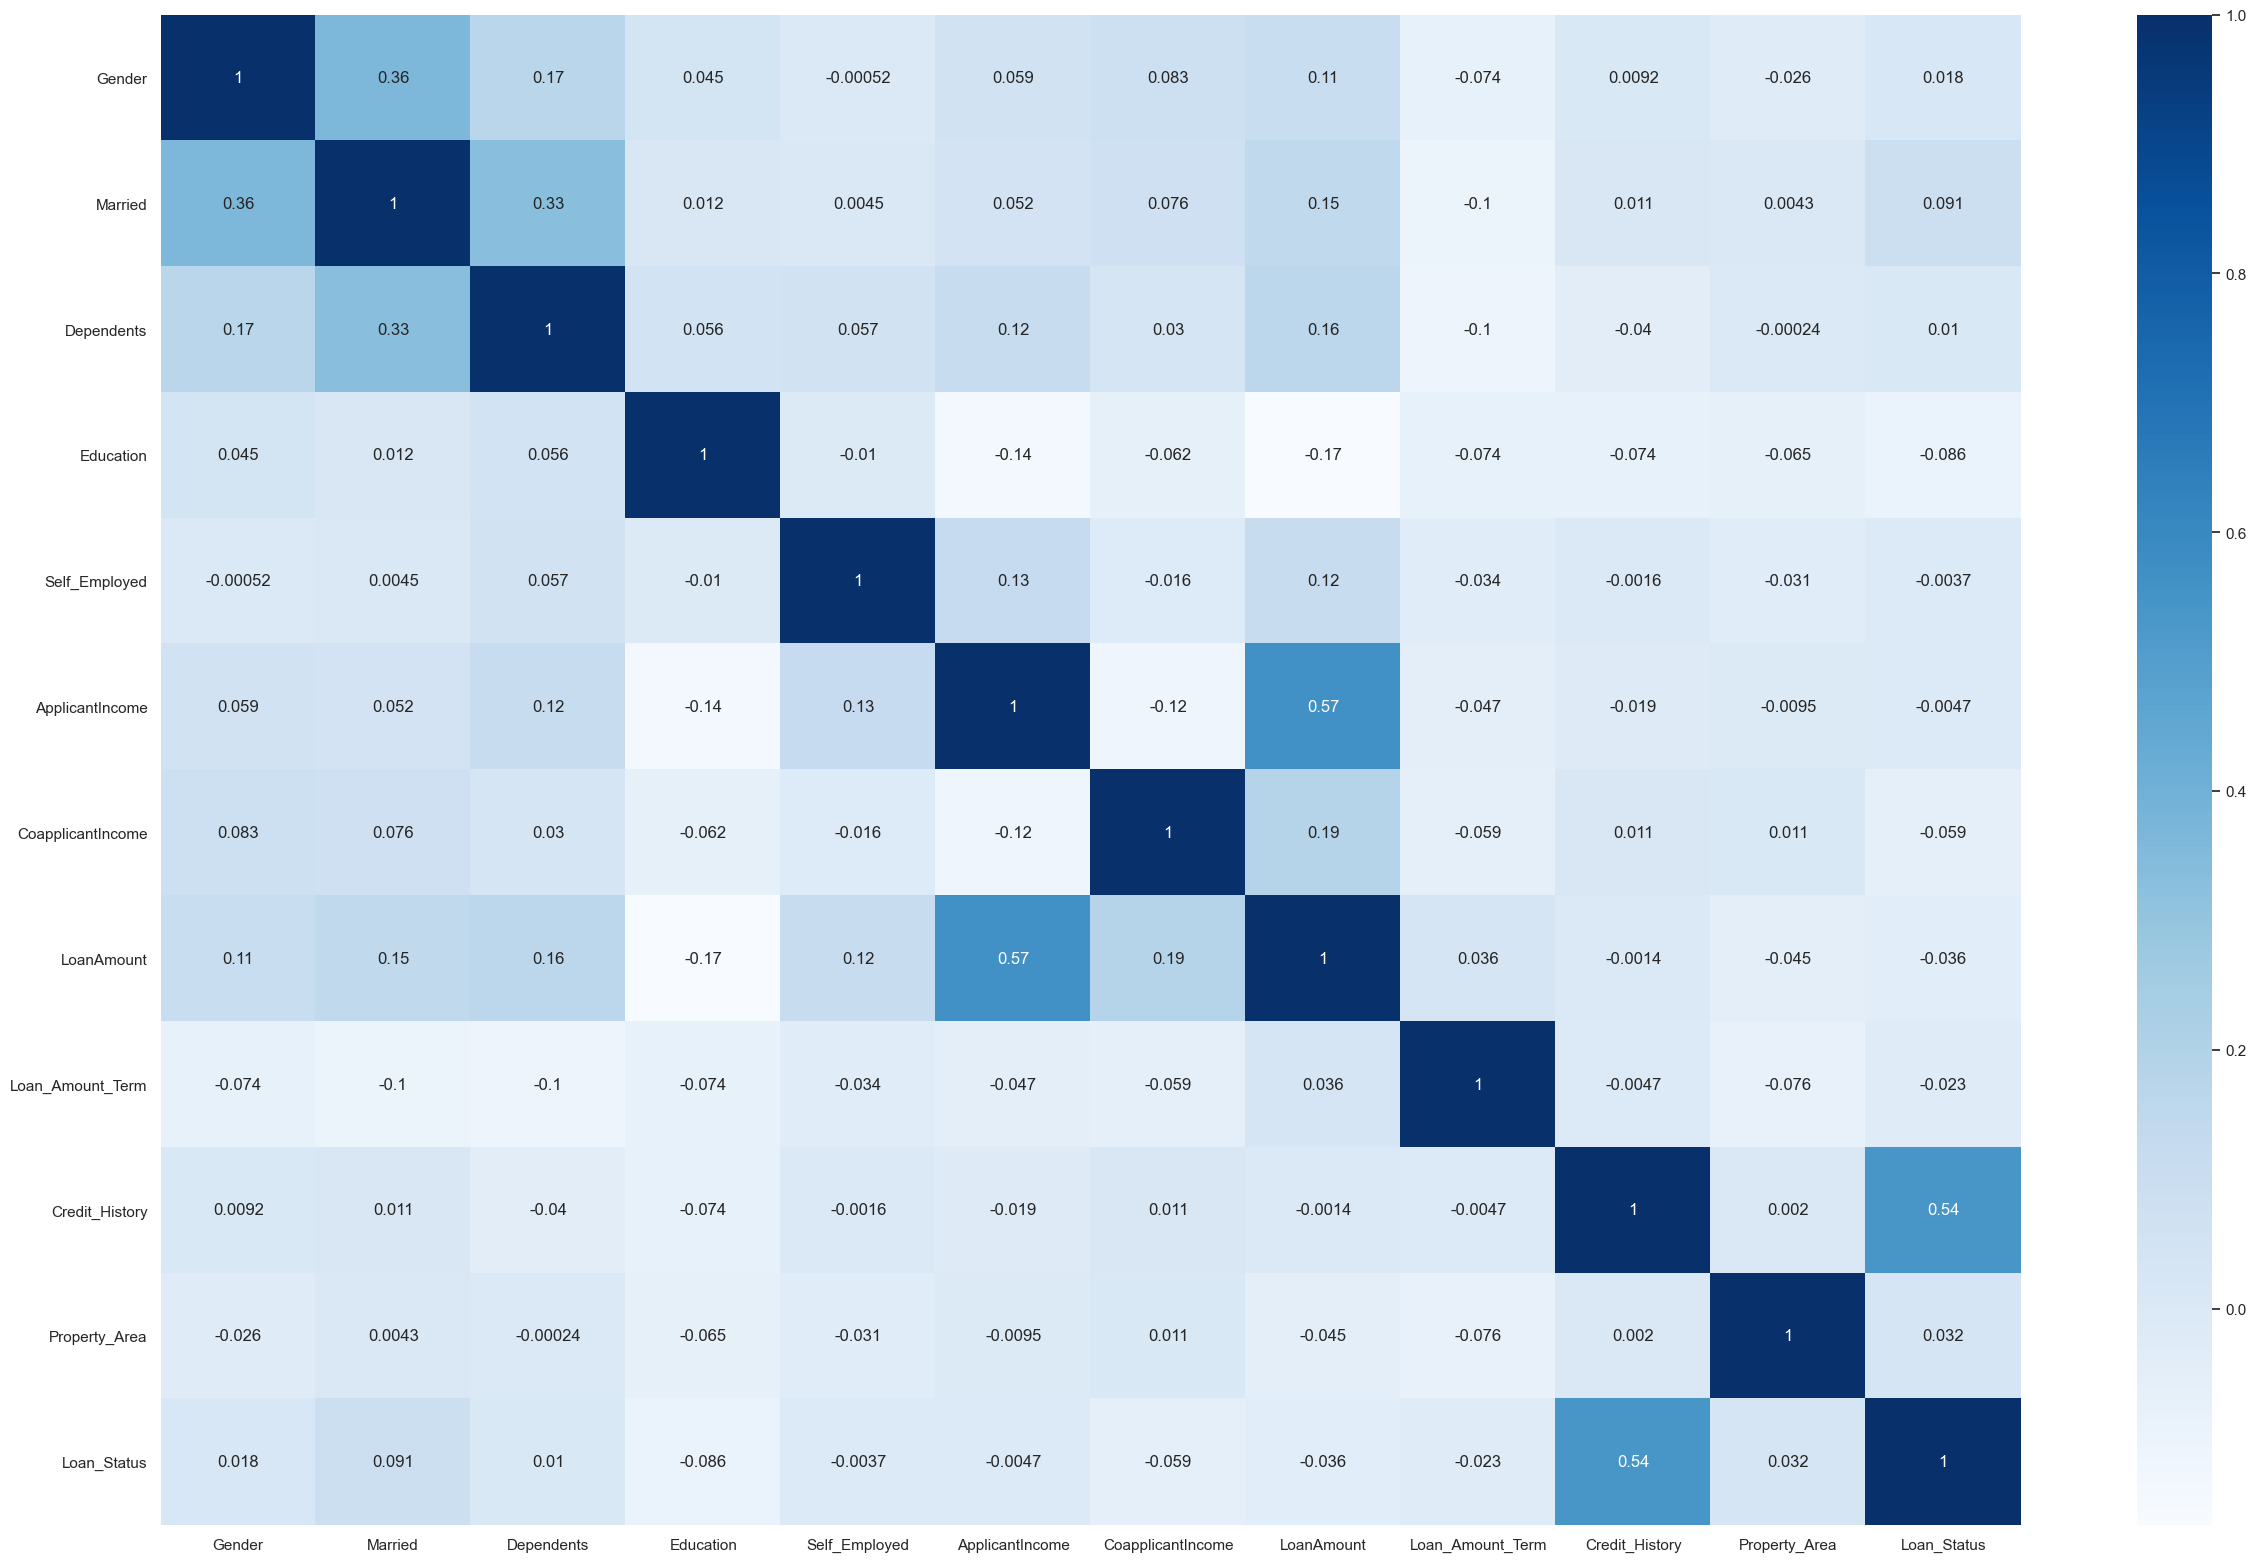

In [56]:
#example of multivariate 
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(30,20),dpi=100)
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

Observation: 
    There is good correlation between LoanAmount and ApplicantIncome.
       

In [57]:
corr_matrix=ds.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

There is not good correlation between LoanStatus and any of the given parameter.

# Plotting Data Cleaning and outlier Handling

Gender                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Married              AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Dependents           AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education            AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Self_Employed        AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
ApplicantIncome      AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
CoapplicantIncome    AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
LoanAmount              AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Loan_Amount_Term     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Credit_History       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Property_Area        AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Loan_Status          AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
dtype: object

<Figure size 3000x2000 with 0 Axes>

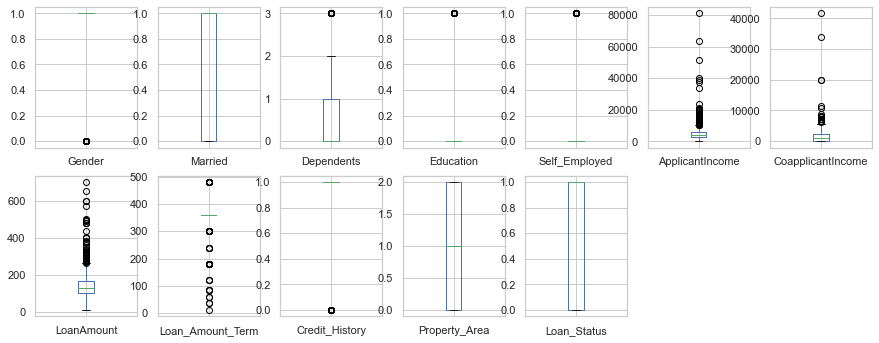

In [58]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

We can see few parameters having outliers

# outliers removal using IQR method

In [59]:
#we checked that thers is outliers, so we can use IQR to remove outliers
def removeOutlier(col):
    sorted(col)
    qua1,qua2 = col.quantile([0.25,0.75])
#IQR calculate 25 to 75% of data
    IQR= qua2 - qua1
    lowerRange = qua1 - (1.5*IQR)
    upperRange= qua2+(1.5*IQR)
    return lowerRange, upperRange

In [60]:
columns1=['Gender','Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in ds[columns1]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

Gender                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Married              AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Dependents           AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education            AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Self_Employed        AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
ApplicantIncome      AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
CoapplicantIncome    AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
LoanAmount              AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Loan_Amount_Term     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Credit_History       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Property_Area        AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Loan_Status          AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
dtype: object

<Figure size 3000x2000 with 0 Axes>

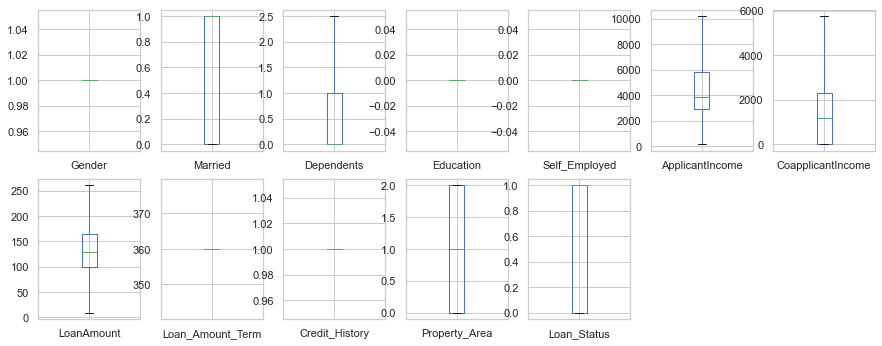

In [61]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

outliers removed from the inputs of dataset

# Check & Treat Skewness

In [62]:
ds.skew()

Gender               0.000000
Married             -0.644850
Dependents           0.822345
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.648627
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

most of columns values are not between 0.5 t0 -0.5, so we have to treat skewness with the help of power transform

In [63]:
#to resolve the skewness, lets divide the new dataset into input and output datasets
ds_x=ds.drop(columns=["Loan_Status"])
y=ds[["Loan_Status"]]

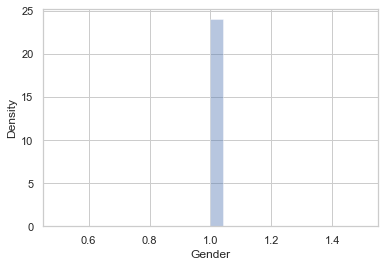

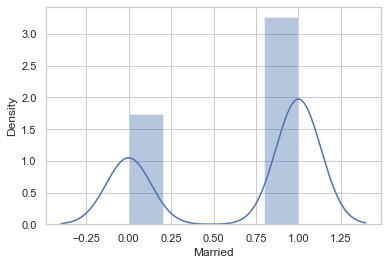

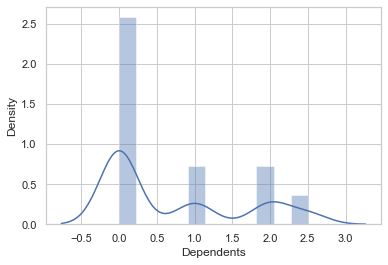

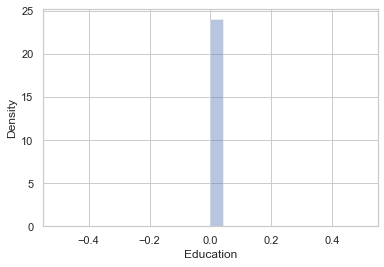

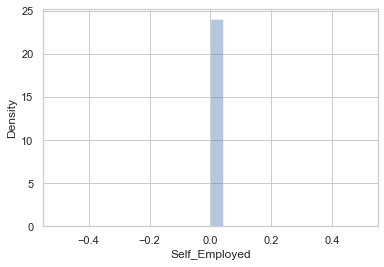

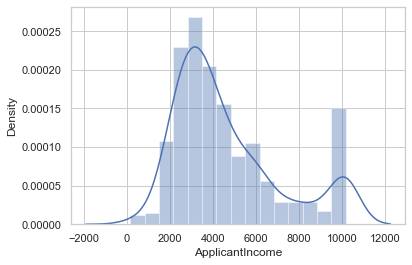

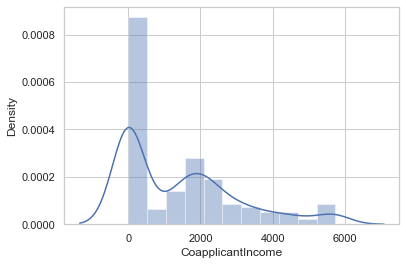

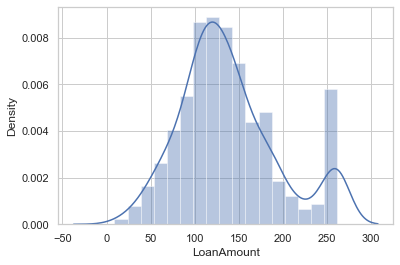

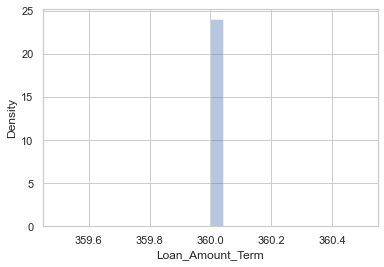

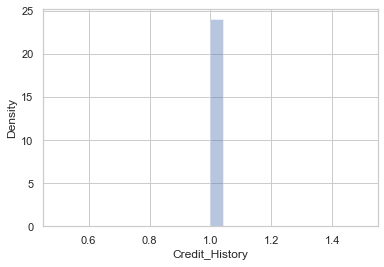

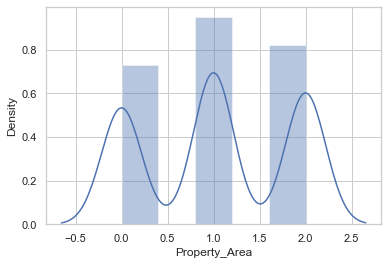

In [64]:
#Plotting skewness
for i in ds_x:
    plt.figure()
    sns.distplot(ds_x[i],kde=True)

In [65]:
ds_x.shape

(614, 11)

In [66]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Loan_Status  614 non-null    int32
dtypes: int32(1)
memory usage: 2.5 KB


In [67]:
ds_x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [68]:
#resolve skewness using power transform.
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform

ds_new=power_transform(ds_x)
ds_new=pd.DataFrame(ds_new,columns=ds_x.columns)

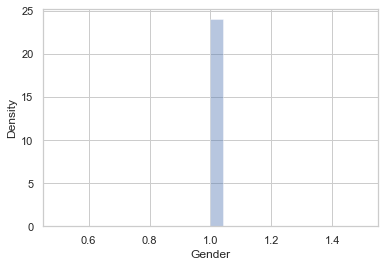

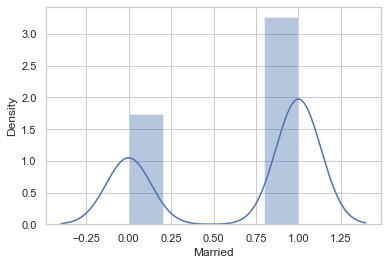

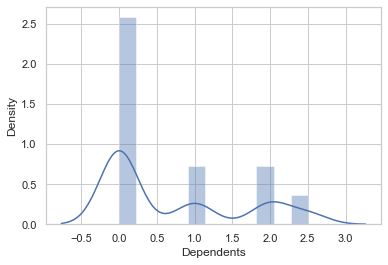

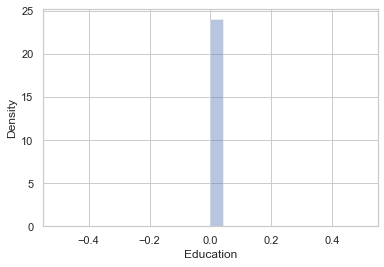

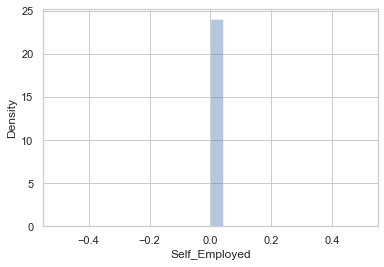

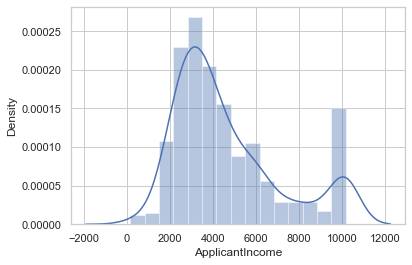

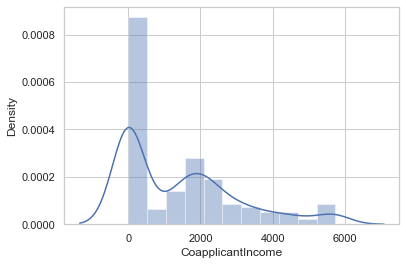

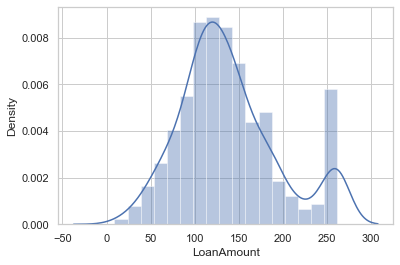

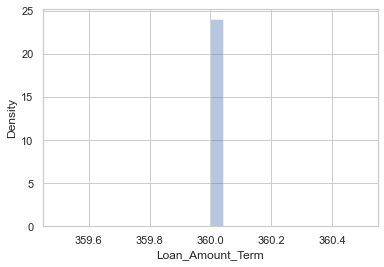

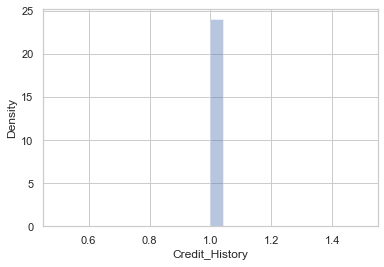

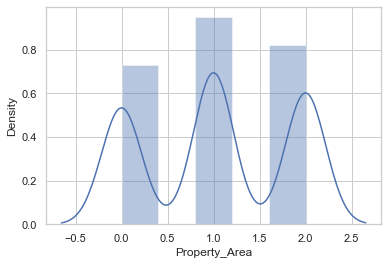

In [69]:
#again plotting skewness
for i in ds_x:
    plt.figure()
    sns.distplot(ds_x[i],kde=True)

In [70]:
ds_new.skew()

Gender               0.000000
Married             -0.644850
Dependents           0.428922
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.035649
CoapplicantIncome   -0.164920
LoanAmount           0.022859
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.158267
dtype: float64

Almost we treated skewness of data variables columns and values are in between 0.5 to -0.5

In [71]:
x=ds_new

In [72]:
ds_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Prepare the data for Predicution and model training

# Model Building (Train test split)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x=ds.drop(['Loan_Status'],axis=1)
y=ds['Loan_Status']

In [90]:
#doing train and test to traing model
#x is the data value and y is the target value
#drop'class' cloumn
x=ds.drop(['Loan_Status'],axis=1)
y=ds['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=45)

print('X train.Shape:',x_train.shape)
print('X test.shape:',x_test.shape)
print('Y train.shape:',y_train.shape)
print('Y test.shape:',y_test.shape)

X train.Shape: (429, 11)
X test.shape: (185, 11)
Y train.shape: (429,)
Y test.shape: (185,)


observations: test size in 25% and random state is 42.
    
    460 rows as train case
    154 rows as test case 

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Build and Evaluate the models

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import precision_recall_curve



lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

Accuracy score of LogisticRegression() is: 0.6702702702702703


Confusion matrix of LogisticRegression() is:
[[  0  61]
 [  0 124]]


Classification report of LogisticRegression() is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



Cross_val_Score of LogisticRegression() is:


[0.69105691 0.69105691 0.67479675 0.68292683 0.68852459]


Score_Mean: 0.6856723977075836


************************************************************************
Accuracy score of GaussianNB() is: 0.6702702702702703


Confusion matrix of GaussianNB() is:
[[  0  61]
 [  0 124]]


Classification report of GaussianNB() is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
       

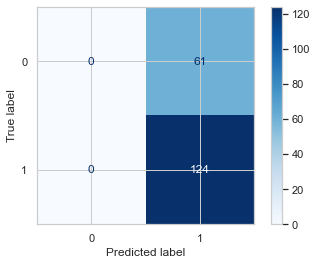

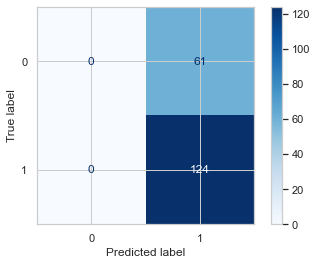

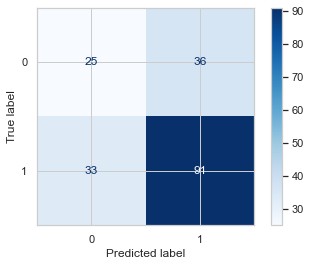

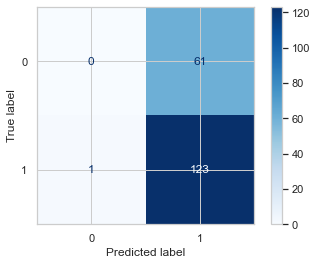

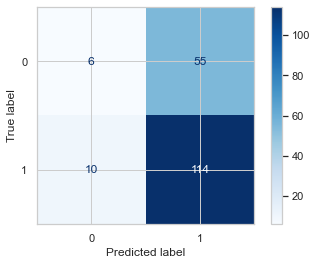

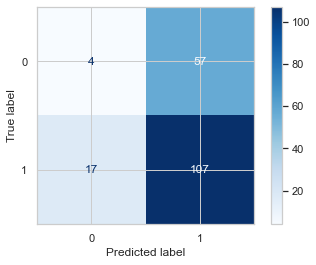

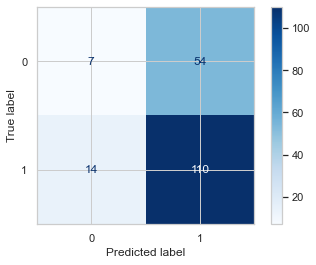

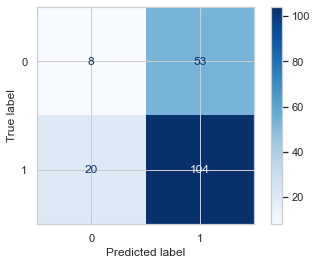

In [93]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(), KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print('Confusion matrix of',m,'is:')
    plot_confusion_matrix(m ,x_test , y_test , cmap = 'Blues' )
    print(confusion_matrix(y_test,predm))
    print('\n')
    print('Classification report of',m, 'is:')
    print(classification_report(y_test,predm))
    print('\n')
    print('Cross_val_Score of',m,'is:')
    score=cross_val_score(lg, x, y, cv=5)
    print('\n')
    print(score)
    print('\n')
    print("Score_Mean:", score.mean())
    print('\n')
    print('************************************************************************')
    

we got the best accuracy score of loan approved is 65% from Logistic Regression,GaussainNB.lets check the hyperperameter tunning and ensemble technique

# Hyper Parameter tunning

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
#GridSearchCV for Decision tree classifier

grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.5780574555403557


# ROC_AUC Curve

In [96]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

lg.fit(x_train,y_train)
gnb.fit(x_train,y_train)
dtc.fit(x_train,y_train)
sv.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
abc.fit(x_train,y_train)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

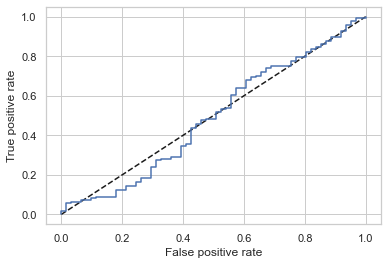

AUC_ROC_SCORE: 0.5


Predicted value: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [97]:
# as per request AUC and ROC for logistic regration
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=lg.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)


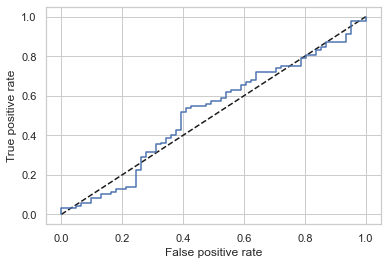

AUC_ROC_SCORE: 0.5


Predicted value: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [98]:
# as per request AUC and ROC for GaussainNB
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GaussainNB")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=gnb.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

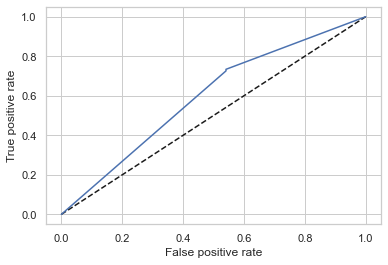

AUC_ROC_SCORE: 0.5924114225277631


Predicted value: [0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [99]:
# as per request AUC and ROC for dtc
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=dtc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

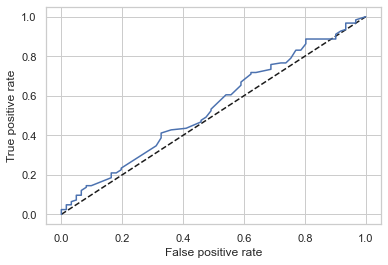

AUC_ROC_SCORE: 0.49272871496562665


Predicted value: [0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [100]:
# as per requevst AUC and ROC for random forest
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=rf.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

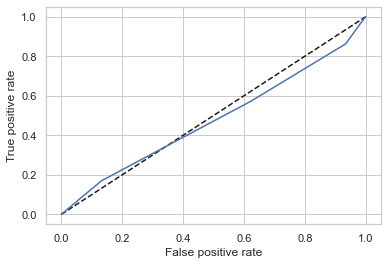

AUC_ROC_SCORE: 0.46423849814912743


Predicted value: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [101]:
# as per requevst AUC and ROC for knn
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=knn.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

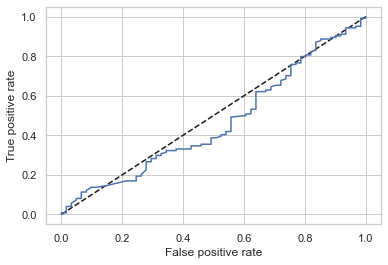

AUC_ROC_SCORE: 0.5009254362771021


Predicted value: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [102]:
# as per requevst AUC and ROC for AdaboosterClassifier
y_pred_prob=abc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ABC")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,abc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=abc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)


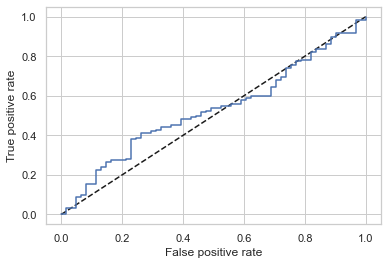

AUC_ROC_SCORE: 0.48492860920148073


Predicted value: [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
actual value: 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int32


In [103]:
# as per requevst AUC and ROC for GradientBoostingClassifier
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GBC")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=gbc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

# Saving Model

In [104]:
#we got the highest accuracy score from logistic regression and gaussainNB so we can save our model with it.
import joblib
joblib.dump(lg,"Loan_Application.obj")

lg_from_joblib=joblib.load("Loan_Application.obj")